#   **Classify Body Performance Dataset**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("../input/body-performance-data/bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
df.shape

(13393, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [6]:
print("Duplicated number:", sum(df.duplicated()))
df = df.drop_duplicates()
print("Duplicated number:", sum(df.duplicated()))

Duplicated number: 1
Duplicated number: 0


In [7]:
X = df.drop(["class"], axis = 1)
y = df [["class"]]
y.value_counts()

class
C        3349
D        3349
A        3347
B        3347
dtype: int64

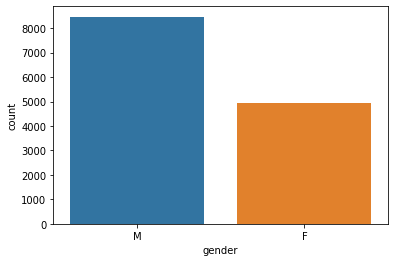

In [8]:
sns.countplot(x = X["gender"]);

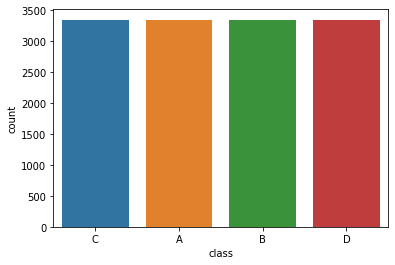

In [9]:
sns.countplot(x = y["class"]);

In [10]:
X = pd.get_dummies(X, columns = ["gender"])

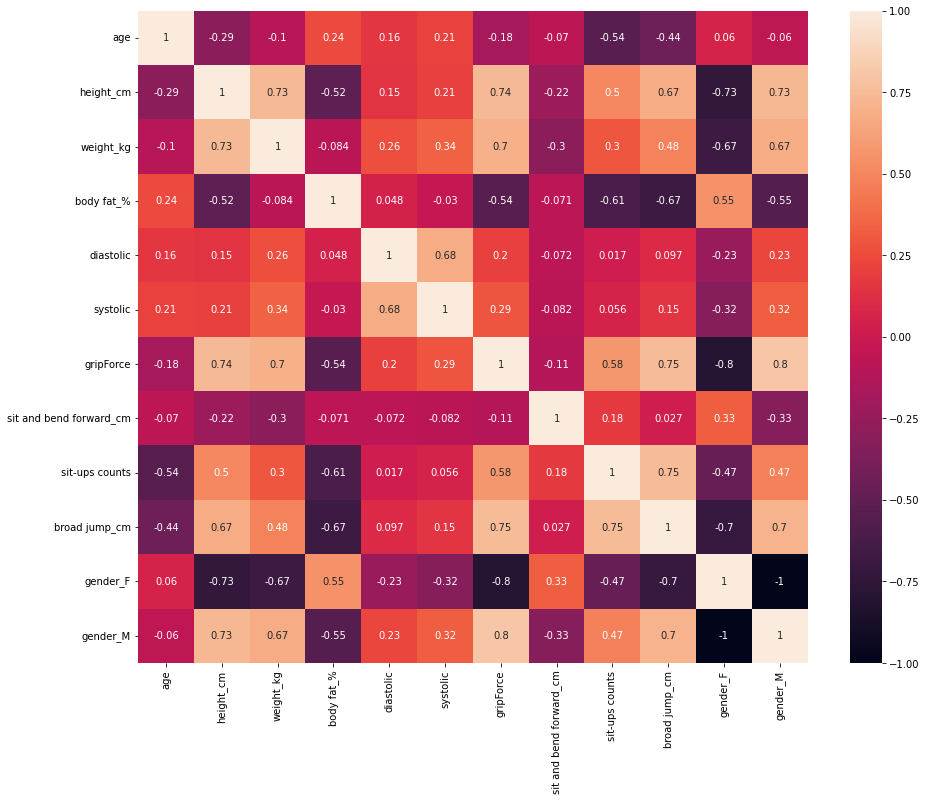

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Logistic Regression**

In [14]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [15]:
print(confusion_matrix(y_test, log_reg.predict(X_test_scaled)))

[[502 155  17   0]
 [159 300 196  24]
 [ 55 130 347 125]
 [ 10  28  97 534]]


In [16]:
print(classification_report(y_test, log_reg.predict(X_test_scaled)))

              precision    recall  f1-score   support

           A       0.69      0.74      0.72       674
           B       0.49      0.44      0.46       679
           C       0.53      0.53      0.53       657
           D       0.78      0.80      0.79       669

    accuracy                           0.63      2679
   macro avg       0.62      0.63      0.62      2679
weighted avg       0.62      0.63      0.62      2679



## **DecisionTreeClassifier**

In [17]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
print(confusion_matrix(y_test, dt.predict(X_test_scaled)))

[[444 147  65  18]
 [135 341 159  44]
 [ 51 129 382  95]
 [ 14  49  81 525]]


In [19]:
print(classification_report(y_test, dt.predict(X_test_scaled)))

              precision    recall  f1-score   support

           A       0.69      0.66      0.67       674
           B       0.51      0.50      0.51       679
           C       0.56      0.58      0.57       657
           D       0.77      0.78      0.78       669

    accuracy                           0.63      2679
   macro avg       0.63      0.63      0.63      2679
weighted avg       0.63      0.63      0.63      2679



## **RandomForestClassifier**

In [20]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
print(confusion_matrix(y_test, rf.predict(X_test_scaled)))

[[569  97   5   3]
 [156 395 100  28]
 [ 53 121 437  46]
 [  9  36  80 544]]


In [22]:
print(classification_report(y_test, rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           A       0.72      0.84      0.78       674
           B       0.61      0.58      0.59       679
           C       0.70      0.67      0.68       657
           D       0.88      0.81      0.84       669

    accuracy                           0.73      2679
   macro avg       0.73      0.73      0.73      2679
weighted avg       0.73      0.73      0.72      2679



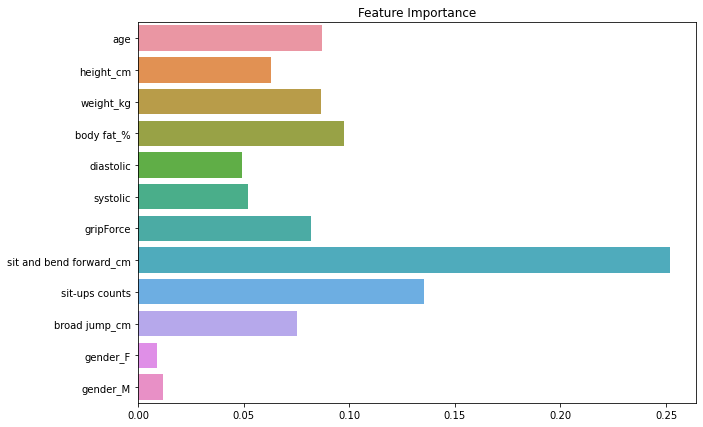

In [23]:
plt.figure(figsize=(10, 7))
sns.barplot(y=X_train.columns, x=rf.feature_importances_, )
plt.title("Feature Importance")
plt.show()